<table>
  <tr>
    <td>
      <h1>Nama : </h1>
    </td>
    <td>
      <h1>Muhammad Bastian Hanafi</h1>
    </td>
  </tr>
  <tr>
    <td>
      <h1>NIM : </h1>
    </td>
    <td>
      <h1>20.11.3714</h1>
    </td>
  </tr>
  <tr>
    <td>
      <h1>Kelas : </h1>
    </td>
    <td>
      <h1>20 iF 07</h1>
    </td>
  </tr>
</table>

#**PENUGASAN**
1. Berikan contoh dataset yang terdapat data pencilan/outlier, Visualisasikan dataset tesebut menggunakan (pilih salah satu)
a. Scatter Plot atau 
b. Box Plot 
2. Buang data pencilan tersebut
3. Visualisasikan lagi setelah data pencilan dibuang dan amati perbedaanya.

Dikumpulkan 1 minggu sejak hari ini dalam format file .ipynb berikut file dataset yang digunakan (.csv)

Penamaan file xxxx.ipynb
xxxx adalah 4 digit terakhir nim Anda

Penamaan file dataset xxxx.csv
xxxx adalah 4 digit terakhir nim Anda


Referensi :

https://ngodingdata.com/python-pandas-cara-menangani-missing-value/

https://ilmudatapy.com/20-function-di-pandas-python-yang-perlu-diketahui-pemula/



<h1>Link Dataset</h1>


https://drive.google.com/file/d/15ougfPbetQ2znTYxmMt9fFBlPIx8G7bN/view?usp=sharing


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [ ]:
url = 'https://drive.google.com/file/d/15ougfPbetQ2znTYxmMt9fFBlPIx8G7bN/view?usp=sharing'
id_file = url.split('/')[-2]
baseurl = 'https://drive.google.com/uc?id=' + id_file
df = pd.read_csv(baseurl)
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


<table>
<thead>
  <tr>
    <th>Feature</th>
    <th>Description</th>
  </tr>
</thead>
<tbody>
<tr>
  <td><code>Tn</code></td>
  <td>min temperature  (°C)</td>
</tr>
<tr>
  <td><code>Tx</code></td>
  <td>max temperature (°C)</td>
</tr>
<tr>
  <td><code>Tavg</code></td>
  <td>avg temperature (°C)</td>
</tr>
<tr>
  <td><code>RH_avg</code></td>
  <td>avg humidity (%)</td>
</tr>
<tr>
  <td><code>RR</code></td>
  <td>rainfall (mm)</td>
</tr>
<tr>
  <td><code>ss</code></td>
  <td>duration of sunshine (hour)</td>
</tr>
<tr>
  <td><code>ff_x</code></td>
  <td>max wind speed (m/s)</td>
</tr>
<tr>
  <td><code>ddd_x</code></td>
  <td>wind direction at maximum speed (°)</td>
</tr>
<tr>
<td><code>ff_avg</code></td>
<td>avg wind speed (m/s)</td>
</tr>
<tr>
<td><code>ddd_car</code></td>
<td>most wind direction (°)</td>
</tr>
<tr>
<td><code>station_id</code></td>
<td>station id which record the data. Detail of the station can be found in station_detail.csv</td>
</tr>
</tbody>
</table>

terdapat banyak sekali data yang kosong

In [ ]:
df.isna().sum()

date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64

saya memutuskan untuk menghapus baris yang memiliki data kosong

In [ ]:
df = df.dropna()
# reindex data setelah drop na
df = df.reset_index(drop=True)
df.isna().sum()

date          0
Tn            0
Tx            0
Tavg          0
RH_avg        0
RR            0
ss            0
ff_x          0
ddd_x         0
ff_avg        0
ddd_car       0
station_id    0
dtype: int64

In [ ]:
# setelah di lakukan drop value yang na sisa data nya adalah sebagai berikut
df.count()
df.to_csv (r'./test.csv', index = False, header=True)

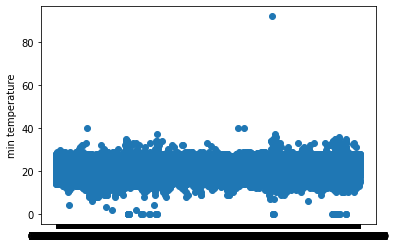

In [ ]:
#melihat outlier
plt.scatter(df['date'],df['Tn'])
plt.ylabel("min temperature")
plt.show()

In [ ]:
#saya mencari outlier pada row Tn dengan metode Z-score
# rumus dari zscore adalah z = (data point - mean) / standard deviation
# karena utuk menghitung zscore sudah ada library nya (menggunakan stasts dari scippy) maka saya menggunakan library tersebut
z = stats.zscore(df['Tn'])
print(z)

0        -0.920229
1        -1.105794
2        -1.476925
3        -1.105794
4        -0.734664
            ...   
372146    0.471511
372147    0.285945
372148    0.842641
372149    0.842641
372150    0.425119
Name: Tn, Length: 372151, dtype: float64


In [ ]:
df.shape

(372151, 12)

In [ ]:
# karena value nya ada yang negatif maka hal tersebut akan mempersulit pada saat filtering data
# maka dari itu saya gunakan fungsi abs pada library numpy agar value nya menjadi positif semua 
z = np.abs(z)
print(z)

0         0.920229
1         1.105794
2         1.476925
3         1.105794
4         0.734664
            ...   
372146    0.471511
372147    0.285945
372148    0.842641
372149    0.842641
372150    0.425119
Name: Tn, Length: 372151, dtype: float64


In [ ]:
#karena dengan metode z score ini data yang merupakan outlier memiliki nilai > 3 atau < -3 dan pada step sebelumnya kita sudah masukkan ke dalam fungsi abs maka kita bisa dengan mudah filtering data outlier
# kita cukup filtering data yang memiliki nilai > 3.
print(np.where(z > 3.000))
outliersIndex = np.where(z > 3.000)
# melihat jumlah outlier data
len(outliersIndex[0])

(array([   545,    969,   1191, ..., 367419, 367466, 367889]),)


6439

In [ ]:
print(outliersIndex[0])
# return dari npwhere adalah nparray, saya convert ke list untuk proses selanjutnya
convertToList = outliersIndex[0].tolist()

print(convertToList)

[   545    969   1191 ... 367419 367466 367889]
[545, 969, 1191, 7744, 10048, 10129, 19667, 19838, 19839, 19840, 19841, 19842, 19843, 19844, 19845, 19846, 19847, 19848, 19849, 19850, 19851, 19852, 19853, 19854, 19855, 19856, 19857, 19858, 19859, 19860, 19861, 19862, 19863, 19864, 19865, 19866, 19867, 19868, 19869, 19870, 19871, 19872, 19873, 19874, 19876, 19877, 19878, 19879, 19881, 19882, 19883, 19884, 19885, 19886, 19887, 19888, 19889, 19891, 19892, 19893, 19894, 19895, 19897, 19898, 19899, 19900, 19901, 19902, 19903, 19904, 19905, 19906, 19907, 19908, 19909, 19910, 19911, 19912, 19913, 19914, 19915, 19916, 19918, 19919, 19920, 19921, 19922, 19923, 19924, 19925, 19927, 19928, 19929, 19930, 19931, 19932, 19933, 19934, 19935, 19936, 19937, 19938, 19939, 19940, 19941, 19942, 19943, 19944, 19945, 19946, 19947, 19948, 19949, 19951, 19952, 19953, 19954, 19955, 19956, 19957, 19958, 19960, 19961, 19962, 19963, 19964, 19965, 19966, 19967, 19968, 19969, 19970, 19971, 19972, 19973, 19974, 19975

In [ ]:
# dari step sebelumnya kita sudah mendapatkan index dari outliers
# selanjutnya lakukan hapus column yang mengandung outlier
df.drop(convertToList, axis=0, inplace=True)

In [ ]:
# jumlah data yang sudah di lakukan pembersihan outlier
df.count()

date          365712
Tn            365712
Tx            365712
Tavg          365712
RH_avg        365712
RR            365712
ss            365712
ff_x          365712
ddd_x         365712
ff_avg        365712
ddd_car       365712
station_id    365712
dtype: int64

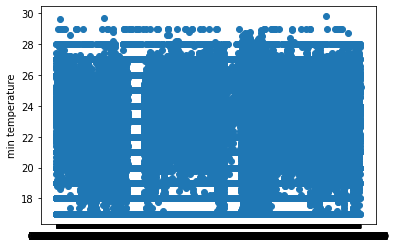

In [ ]:
# visualisasi data setelah outlier di hapus
plt.scatter(df['date'],df['Tn'])
plt.ylabel("min temperature")
plt.show()